In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [4]:
def draw_line(coef, intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min)
    # i.e ax+by+c = 0
    # ==> ax = (-by-c)
    # ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max)
    # i.e ax+by+c = 0
    # ==> ax = (-by-c)
    # ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

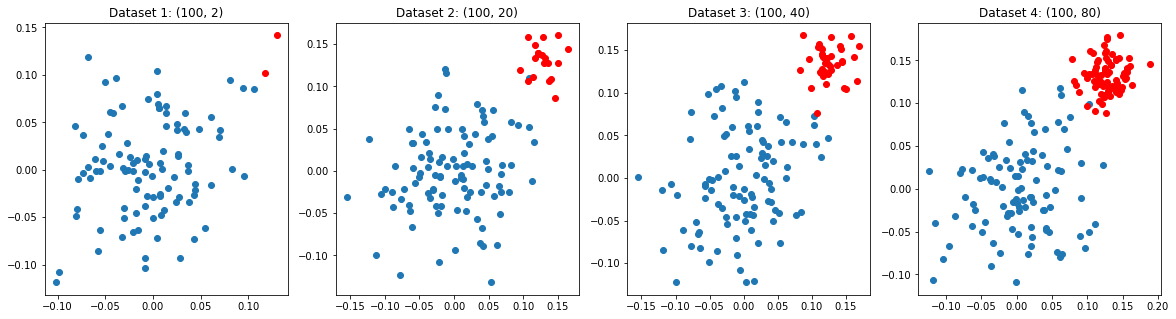

In [5]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j, i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p = np.random.normal(0, 0.05, size=(i[0], 2))
    X_n = np.random.normal(0.13, 0.02, size=(i[1], 2))
    y_p = np.array([1]*i[0]).reshape(-1, 1)
    y_n = np.array([0]*i[1]).reshape(-1, 1)
    X   = np.vstack((X_p, X_n))
    y   = np.vstack((y_p, y_n))
    plt.title('Dataset ' + str(j+1)+ ': ' +str(i))
    plt.scatter(X_p[:, 0], X_p[:,1])
    plt.scatter(X_n[:, 0], X_n[:,1], color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on i-th dataset and j-th
learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

In [6]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
c = [0.001, 1, 100]

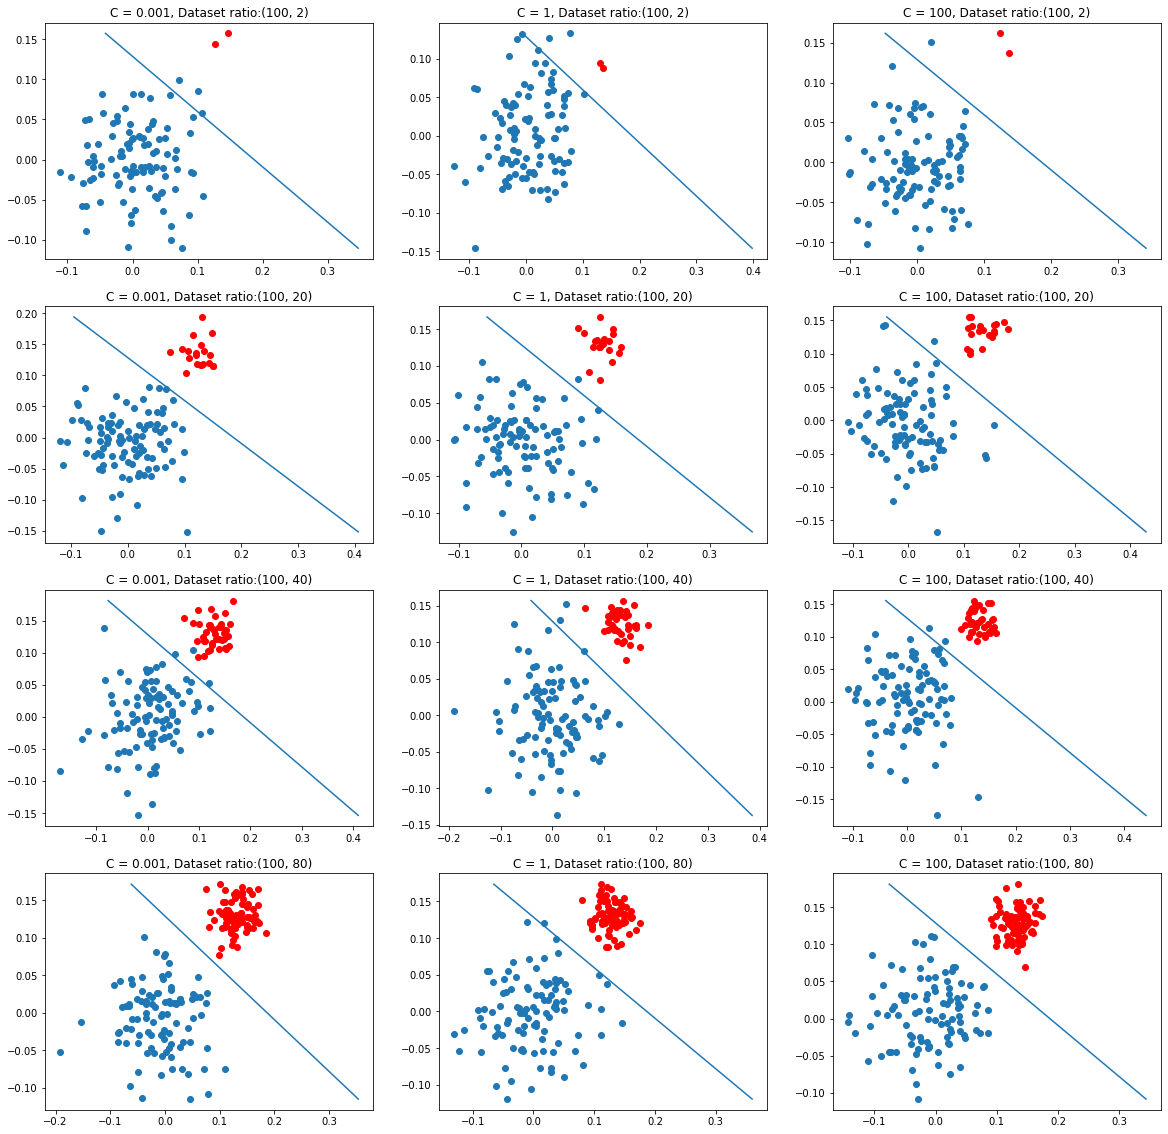

In [15]:
plt.figure(figsize=(20,20))
num = 1
for j, i in enumerate(ratios):
    for k in range(0, 3):
        svc_clf = SVC(C=c[k], kernel='linear')
        #model = LinearSVC(C=c[k])
        plt.subplot(4, 3, num)
        num += 1
        X_p = np.random.normal(0, 0.05, size=(i[0], 2))
        X_n = np.random.normal(0.13, 0.02, size=(i[1], 2))
        y_p = np.array([1]*i[0]).reshape(-1, 1)
        y_n = np.array([0]*i[1]).reshape(-1, 1)
        X   = np.vstack((X_p, X_n))
        y   = np.vstack((y_p, y_n))
        
        svc_clf.fit(X, y)
        
        plt.title('C = '+ str(c[k]) + ', Dataset ratio:' + str(i))
        plt.scatter(X_p[:, 0], X_p[:,1])
        plt.scatter(X_n[:, 0], X_n[:,1], color='red')
        draw_line(coef=model.coef_[0],intercept=model.intercept_,mi=min(X[:,1]), ma= max(X[:,1]))
        
        '''ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # # plot the decision function
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        # create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1])
        yy = np.linspace(ylim[0], ylim[1])
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = svc_clf.decision_function(xy).reshape(XX.shape)

        # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                  linestyles=['--', '-', '--'])
        
        # plot support vectors
        ax.scatter(svc_clf.support_vectors_[:, 0], svc_clf.support_vectors_[:, 1], s=50,
                  linewidth=1, facecolors='none', edgecolors='k')
        # plt.savefig()'''
plt.show()

#### Observations:
##### For C = 0.001 <br>
for Dataset 1 (100:2) model is underfited <br>
for Dataset 2 (100:20) model is underfited than dataset 1 <br>
for Dataset 3 (100:40) model is more underfited than dataset 2 <br>
for Dataset 4 (100:80) model is by far most underfited <br>
###### For C = 1 <br>
for Dataset 1 (100:2) model is underfited <br>
for Dataset 2 (100:20) model is underfited than dataset 1 <br>
for Dataset 3 (100:40) model is more underfited than dataset 2 <br>
for Dataset 4 (100:80) model is highly underfited <br>
##### For C = 100 <br>
for Dataset 1 (100:2) model is slightly underfited, but better than previous c =0.01 and c=1 <br>
for Dataset 2 (100:20) model is fited well <br>
for Dataset 3 (100:40) model is very slightly overfited <br>
for Dataset 4 (100:80) model is fitted well <br>

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

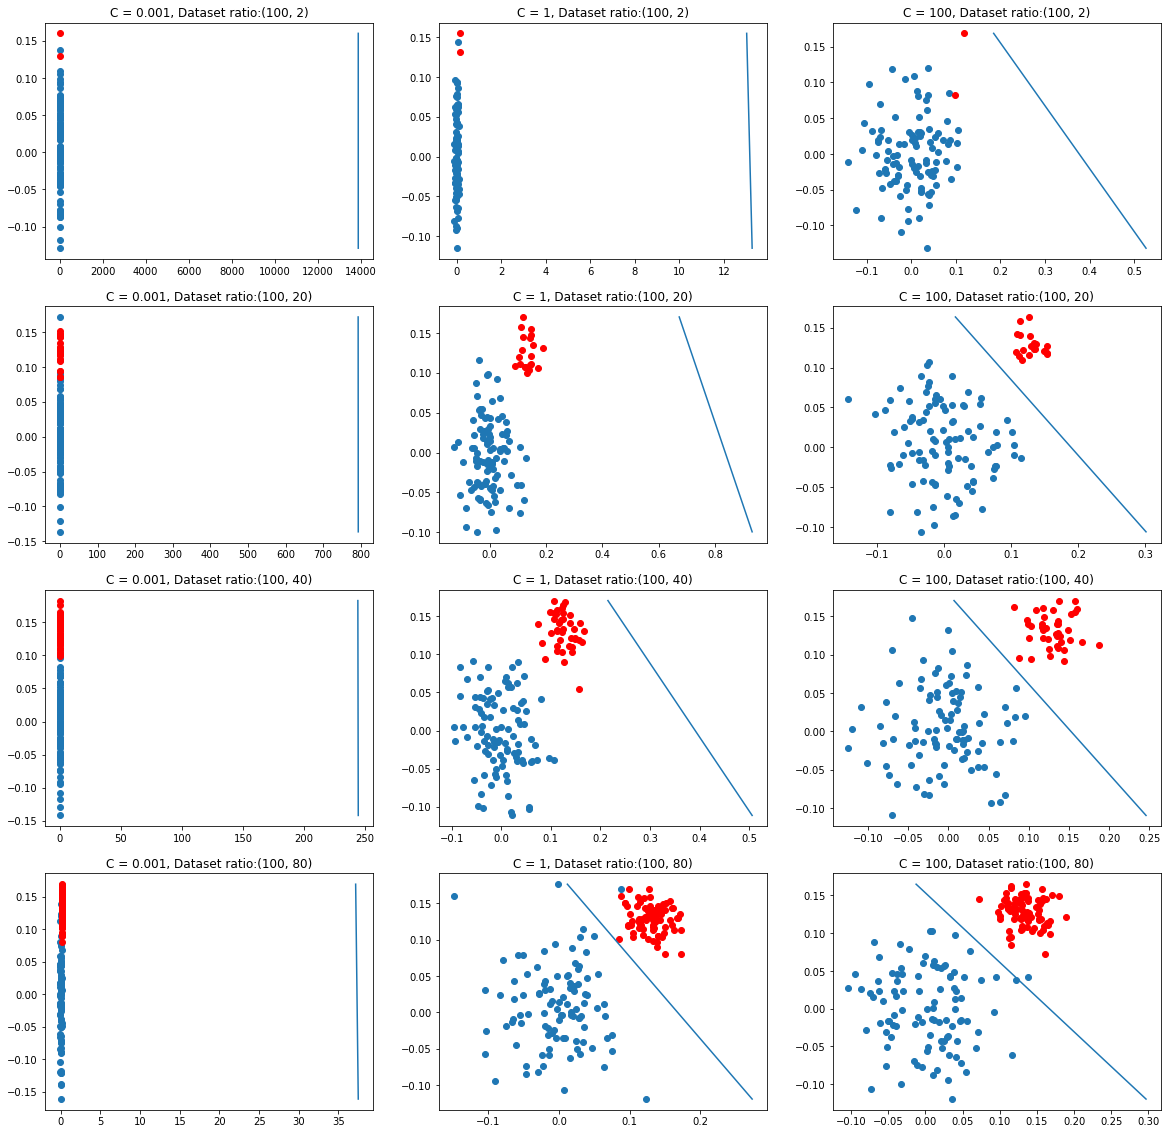

In [13]:
#you can start writing code here.
plt.figure(figsize=(20,20))
num = 1
for j, i in enumerate(ratios):
    for k in range(0, 3):
        model = LogisticRegression(C=c[k])
        plt.subplot(4, 3, num)
        num += 1
        X_p = np.random.normal(0, 0.05, size=(i[0], 2))
        X_n = np.random.normal(0.13, 0.02, size=(i[1], 2))
        y_p = np.array([1]*i[0]).reshape(-1, 1)
        y_n = np.array([0]*i[1]).reshape(-1, 1)
        X   = np.vstack((X_p, X_n))
        y   = np.vstack((y_p, y_n))
        model.fit(X, y)
        plt.title('C = '+ str(c[k]) + ', Dataset ratio:' + str(i))
        plt.scatter(X_p[:, 0], X_p[:,1])
        plt.scatter(X_n[:, 0], X_n[:,1], color='red')
        draw_line(coef=model.coef_[0],intercept=model.intercept_,mi=min(X[:,1]), ma= max(X[:,1]))
plt.show()

#### Observation:
##### for C = 0.001 <br>
All the dataset we could not able to find decision boundry it is highlt underfited <br>
##### for C = 1 <br>
for Dataset 1 (100:2) and Dataset 2 (100:20) model is highly underfited, most probable reason is class imbalanace <br>
for Dataset 3 (100:40) model is slightly underfited <br>
for Dataset 4 (100:80) model is fitted well <br>
##### for C = 100 <br>
for Dataset 1 (100:2) model is slightly underfited, most probable reason is class imbalanace, this model is better than model <br>
##### for C =0.001 and C = 1 <br>
for Dataset 2 (100:20) model is overfited <br>
for Dataset 3 (100:40) model is overfited but less than dataset 2 <br>
for Dataset 4 (100:80) model is fitted well <br>

### Over-All Observations:
###### Over-All SVC model was better at classifiction than the LinearRegression model. ( "compare C=1, Dataset ratio: (100, 40)"  for both models)

1. When c = 0.001
As c is very small, the linear models were unable to classify the data, we can observe that the hyperplane position is very much away from the data points. Data being balanced or imbalanced doesn't make any difference here as the c value is very small.
<br>
<br>
2. When c = 1
The hyperplane is far from the data points, we can say that these linear models cannot classify the imbalanced dataset.<br>
In the last case [C=1, Dataset ration: (100,80)], where the dataset is almost balanced, we can see that the model can classify with bit errors, but this seems to work well only if the data is balanced.
<br>
<br>
3. When c = 100
The model is not able to classify the highly imbalanced dataset as even with a high value of c. So we can conclude that this model does not work well, or it's not recommended to use this when we have a highly imbalanced dataset. As the data becomes the model does a pretty good job in classification.